
#  All Libraries 



In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import csv
import glob
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocess
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
 N=400;
data=np.zeros((N,4096))


# Showing the image


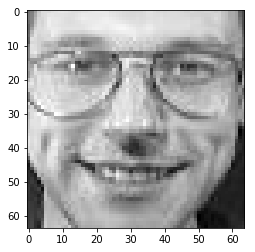

In [5]:
img = mpimg.imread("/Users/lovepreetsingh/Desktop/My_Computer/All_Semesters/Spring_2018/CS_5661/Homework/HW3/Face/7.jpg")
plt.imshow(img, cmap=plt.cm.gray)


# Reading the images and building feature matrix 


In [7]:
for i in range(N):
    img = mpimg.imread("/Users/lovepreetsingh/Desktop/My_Computer/All_Semesters/Spring_2018/CS_5661/Homework/HW3/Face/"+str(i)+".jpg")
    img_length = np.reshape(img,4096)
    data[i]=np.copy(img_length)
    


# Reading the Label.csv and building Label Vector


In [9]:
labels_read = pd.read_csv('/Users/lovepreetsingh/Desktop/My_Computer/All_Semesters/Spring_2018/CS_5661/Homework/HW3/Face/label.csv')
y = labels_read['Label']
y.shape

(400,)


# Normalizing the data 


In [10]:
normalize_feature=preprocess.scale(data)
normalize_feature.shape

(400, 4096)


# Spliting the Normailzed Data into training and testing data


In [11]:
X_train, X_test, y_train, y_test = train_test_split(normalize_feature, y, test_size=0.25, random_state=5)
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)

X_train (300, 4096)
y_train (300,)
X_test (100, 4096)



# Applying PCA on the Split Data


In [12]:
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction:
X_Train_new = my_pca. fit_transform(X_train)
X_Test_new =  my_pca. transform(X_test)
print('X_train', X_Train_new.shape)
print('X_test',X_Test_new.shape)

X_train (300, 50)
X_test (100, 50)



# #f SVM implementation


In [13]:
svm_model=svm.SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)

In [14]:
svm_model.fit(X_Train_new, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
svm_predict=svm_model.predict(X_Test_new)
score_svm = accuracy_score(y_test, svm_predict)
print(score_svm)

0.91



# Confusion Matrix


In [16]:
from sklearn import metrics

confusion_svm = metrics.confusion_matrix(y_test, svm_predict)

print("Confusion matrix:")
print(confusion_svm)

Confusion matrix:
[[3 0 0 ..., 0 0 0]
 [0 3 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 4 0]
 [0 0 0 ..., 0 0 1]]


# Appling PCA again to get merged Data

In [17]:
k = 50 # (k is the number of components (new features) after dimensionality reduction)
my_pca = PCA(n_components = k)
merge = my_pca. fit_transform(normalize_feature)
merge.shape

(400, 50)

# GridSearchCV

In [18]:
param_grid = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]

grid_dict = dict( C = param_grid)

clf = svm.SVC(kernel='rbf',gamma=0.0005,random_state=1)

grid = GridSearchCV(clf, grid_dict, cv=10, scoring='accuracy')
grid.fit(merge,y)
print('Best_Score',grid.best_score_)
print(grid.best_params_)

Best_Score 0.965
{'C': 10}
